# 차원축소 


### 1. 필요 라이브러리 임포트 

In [1]:
import pandas as pd # pandas package
from sklearn.preprocessing import StandardScaler # PCA 전 특성에 대한 스케일링 
from sklearn.decomposition import PCA # 주성분 분석 package 
from sklearn.manifold import TSNE # t-SNE package 
import numpy as np  # numpy package : 
import scipy.stats as stats 
import matplotlib.pyplot as plt #  matplotlib 시각화 패키지 
%matplotlib inline
import seaborn as sns # seaborn 시각화 패키지 

# os에 따른 Font 깨짐 제거를 위해 Font 지정 
import os 
if os.name == 'nt' :  # Windows OS 
    font_family = "Malgun Gothic"
else: # MAC OS 
    font_family = "AppleGothic"
    
# - 값이 깨지는 문제 해결을 위해 파라미터 값 설정 
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})  

### 2. 붓꽃 데이터 로드 

- 붓꽃 데이터는 통계학자 피셔(R.A Fisher)의 붓꽃의 분류 연구에 기반한 데이터다. load_iris() 명령으로 로드한다. 데이터는 다음과 같이 구성되어 있다.

- 타겟 데이터 : setosa, versicolor, virginica의 세가지 붓꽃 종(species)

- 특징 데이터 : 꽃받침 길이(Sepal Length), 꽃받침 폭(Sepal Width), 꽃잎 길이(Petal Length), 꽃잎 폭(Petal Width)

In [2]:
#iris 붓꽃 데이터 로드 
from sklearn.datasets import load_iris
iris = load_iris()
# print(iris.DESCR) # 붓꽃 데이터 상세 정보 

In [3]:
# 붓꽃 데이터 특성 확인 
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### 3. 데이터 프레임 변환 

In [4]:
# 데이터 생성 및 준비 
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# sy = pd.Series(iris.target, dtype="category")
# sy = sy.cat.rename_categories(iris.target_names)
# df['species'] = sy

df['target']=iris.target

# 필터 명 정의 
cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


### 4. iris data 시각화 

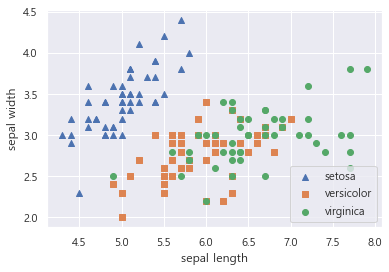

In [5]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

### 4. 주성분 분석(PCA)

In [6]:
# 개별 속성을 함께 스케일링
# PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요
from sklearn.preprocessing import StandardScaler # PCA 전 특성에 대한 스케일링 

iris_scaled = StandardScaler().fit_transform(df.iloc[:, :-1]) 

In [7]:
# n_components : PCA로 변환할 차원의 수

pca = PCA(n_components=2)

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [8]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(5)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


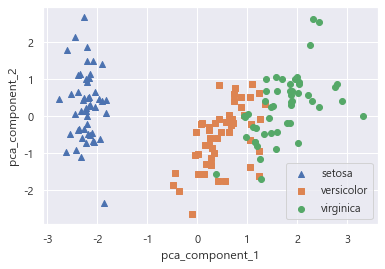

In [9]:
#PCA로 차원 축소된 데이터셋 시각화 
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
# PCA 컴포넌트별로 차지하는 변동성 비율 확인
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [11]:
# 원본 데이터와 PCA데이터로 분류 모델 실행
# 램덤포레스트 알고리즘. 교차 검증 수행 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

In [12]:
rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print("원본 데이터 교차 검증 정확도 : ", scores)
print("원본 데이터 교차 검증 평균 정확도 : ", np.mean(scores))

원본 데이터 교차 검증 개별 정확도 :  [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도 :  0.96


In [13]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print("PCA 데이터 교차 검증 정확도 : ", scores_pca)
print("PCA 데이터 교차 검증 평균 정확도 : ", np.mean(scores_pca))

PCA 데이터 교차 검증 개별 정확도 :  [0.88 0.88 0.88]
PCA 데이터 교차 검증 평균 정확도 :  0.88


### 5. t-SNE

In [14]:
# 데이터 프레임 확인 
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [15]:
# class target 정보 제외
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]

# 2차원 t-SNE 임베딩
tsne_np = TSNE(n_components = 2).fit_transform(train_df)

# numpy array -> DataFrame 변환
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

In [16]:
tsne_df.head()

,component 0,component 1
0,9.731649,-23.202362
1,9.191244,-20.458002
2,10.330772,-20.813650
3,10.020608,-20.298296
4,10.153105,-23.262079


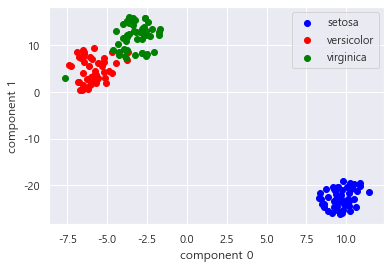

In [17]:
# class target 정보 불러오기 
tsne_df['target'] = df['target']

# target 별 분리
tsne_df_0 = tsne_df[tsne_df['target'] == 0]
tsne_df_1 = tsne_df[tsne_df['target'] == 1]
tsne_df_2 = tsne_df[tsne_df['target'] == 2]

# target 별 시각화
plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color = 'blue', label = 'setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color = 'red', label = 'versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color = 'green', label = 'virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()